In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


C:\Users\User\AppData\Local\Temp\ipykernel_16144\3538350959.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:

data=pd.read_csv("Salary_Data.csv")
# Complete empty field
data=data.ffill()
# Print info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6704 non-null   float64
 1   Gender               6704 non-null   object 
 2   Education Level      6704 non-null   object 
 3   Job Title            6704 non-null   object 
 4   Years of Experience  6704 non-null   float64
 5   Salary               6704 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [4]:
x=data[["Years of Experience"]]
y=data["Salary"]

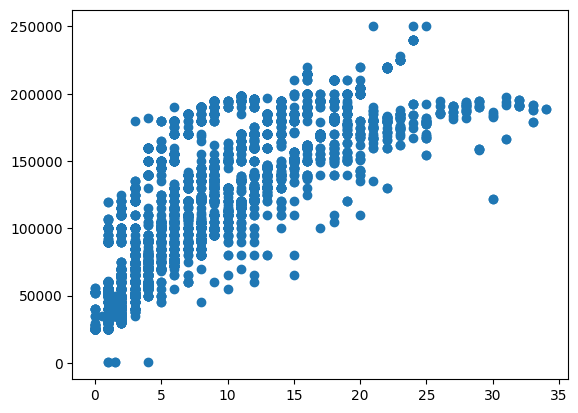

In [5]:
plt.scatter(x,y)

In [6]:
from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(x,y,test_size=1/3,random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [8]:
model.fit(X_train,y_train)

LinearRegression()

In [9]:
print(model.coef_)
print(model.intercept_) 

[7136.53116447]
57541.07530678384


Text(0, 0.5, 'Salary')

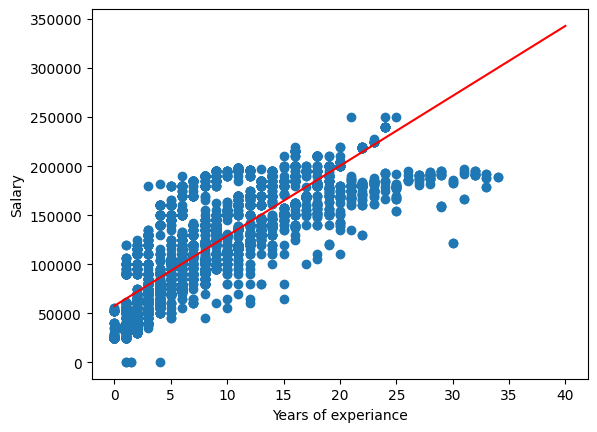

In [10]:
ordonne= np.linspace(0,40,1000)
plt.scatter(x,y)
plt.plot(ordonne,model.coef_[0]*ordonne+model.intercept_,color='r')
plt.xlabel("Years of experiance")
plt.ylabel("Salary")

In [11]:
y_predict=model.predict(X_test)

from sklearn import metrics
print("R2 : ",metrics.r2_score(y_test,y_predict))

R2 :  0.6536122995705353


In [22]:
test=[[0]]
t=pd.DataFrame(test,columns=["Years of Experience"])
# print(X_test)
model.predict(t)

array([57541.07530678])

In [24]:
from joblib import dump,load
# Sauvegarder le modèle
dump(model, 'model.joblib')

['model.joblib']

In [25]:
# Charger le modèle sauvegardé
reg_loaded = load('model.joblib')
reg_loaded.predict(t)


array([57541.07530678])